# Data Preparation

## Data Generation

In [ ]:
# Generating some random data for demonstration
def GenerateRandomData(n, r):
    np.random.seed(0)
    X = np.random.randn(n, r)  # n samples, r predictors
    true_coef = np.random.rand(r+1)  # Random coefficients
    intercept = true_coef[1]

    # Correct dot product calculation
    y = intercept + np.dot(X, true_coef[1:]) + np.random.randn(n)  # Add noise

    return X, y, true_coef

# Generate sample data
X, y, true_coef = GenerateRandomData(100, 3) # y-shape remains 1

print(X.shape)
print(X[:10])
print('\n')

print(y.shape)
print(y[:10])
print('\n')

print(f"Actual Incepcept: {true_coef[1]}, coeffecients: {true_coef[1:]}")
print('\n')

(100, 3)
[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574 -2.55298982]
 [ 0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852]
 [-0.18718385  1.53277921  1.46935877]]


(100,)
[ 2.20778774  0.53328583 -0.61053662 -0.15899447  1.59127384  0.37851249
 -0.74664329  1.47611155  0.10415197  0.31235666]


Actual Incepcept: 0.3984342586196771, coeffecients: [0.39843426 0.06271295 0.42403225]




# Linear Model - Assumptions

## Testing Linearity:
predicted values vs residuals

A random pattern suggests linearity

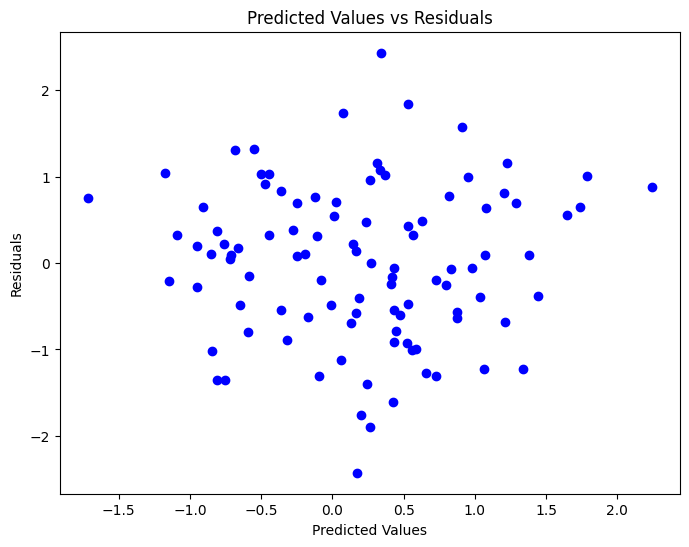

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit a linear regression model
X_with_intercept = sm.add_constant(X)  # Adds intercept term to the predictors
model = sm.OLS(y, X_with_intercept)  # Ordinary Least Squares (OLS) regression
results = model.fit()

# Get predicted values
y_pred = results.fittedvalues

# Calculate residuals
residuals = y - y_pred

# Plotting Predicted Values vs Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.show()

## Testing Independence (Durbin-Watson test):
The Durbin-Watson statistic can be computed to check for autocorrelation of residuals.

A value close to 2 indicates no autocorrelation.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Get the residuals
residuals = results.resid

# Compute Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 1.9939727255855428


## Testing Homoscedasticity of Variance

i.e., constant variance of residuals across all levels of the predictors.

we can use

the Breusch-Pagan test or

residuals vs. fitted values plot.

### Interpreting the Breusch-Pagan Test:

Null hypothesis (H₀): Homoscedasticity (constant variance of residuals).

Alternative hypothesis (H₁): Heteroscedasticity (non-constant variance of residuals).

If the p-value is greater than 0.05, we fail to reject the null hypothesis and assume homoscedasticity.

If the p-value is less than 0.05, we reject the null hypothesis and conclude that the data exhibits heteroscedasticity.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_intercept)

# The test results: bp_test[0] = LM Statistic, bp_test[1] = p-value
print(f"Breusch-Pagan Test Statistic: {bp_test[0]}")
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")

Breusch-Pagan Test Statistic: 1.6408749372471498
Breusch-Pagan Test p-value: 0.6501576213241509


### residuals vs. fitted values

Random scatter around the horizontal red line at 0 suggests homoscedasticity.

Patterns (e.g., a funnel shape) suggest heteroscedasticity.

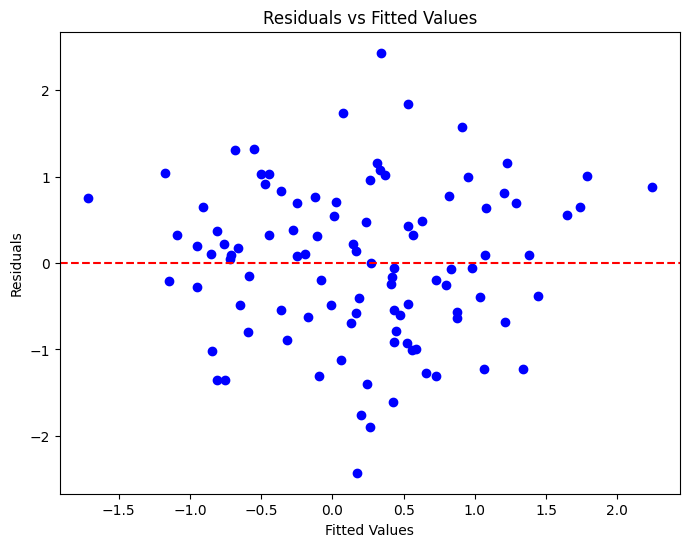

In [ ]:
import matplotlib.pyplot as plt

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


## Normality of Residuals

1. Shapiro-Wilk Test:

2. Q-Q Plot:

### Shapiro-Wilk Test

statistical approach to test if the residuals follow a normal distribution.

The null hypothesis (H₀) is that the data is normally distributed.

p-value > 0.05: Fail to reject the null hypothesis (residuals are normally distributed).

p-value < 0.05: Reject the null hypothesis (residuals are not normally distributed).

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"Shapiro-Wilk Test p-value: {shapiro_p_value}")


Shapiro-Wilk Test Statistic: 0.9944368706682699
Shapiro-Wilk Test p-value: 0.9578207516731218


### Q-Q Plot
plot the residuals against a theoretical normal distribution.

If the residuals follow a straight line in the plot, it indicates normality.

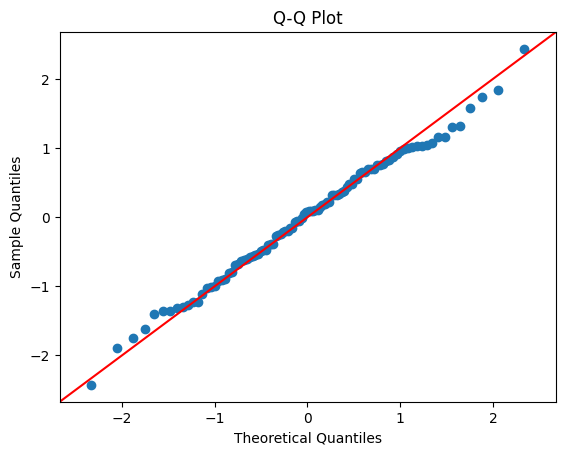

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot for normality check
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot')
plt.show()

## No Multicollinearity

1. Correlation Matrix
2. Variance Inflation Factor (VIF)

### Variance Inflation Factor (VIF)

Quantifies how much the variance of the estimated regression coefficients is inflated due to multicollinearity.

The general rule for interpreting VIF:

VIF < 5: No significant multicollinearity.

VIF > 10: High multicollinearity, indicating that predictors are highly correlated.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
X_with_intercept = sm.add_constant(X)  # Adds intercept term to the predictors

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = range(X_with_intercept.shape[1])  # Index for the predictors
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept, i) for i in range(X_with_intercept.shape[1])]

print(vif_data)

   Feature       VIF
0        0  1.041864
1        1  1.017871
2        2  1.005770
3        3  1.012785


### Correlation Matrix

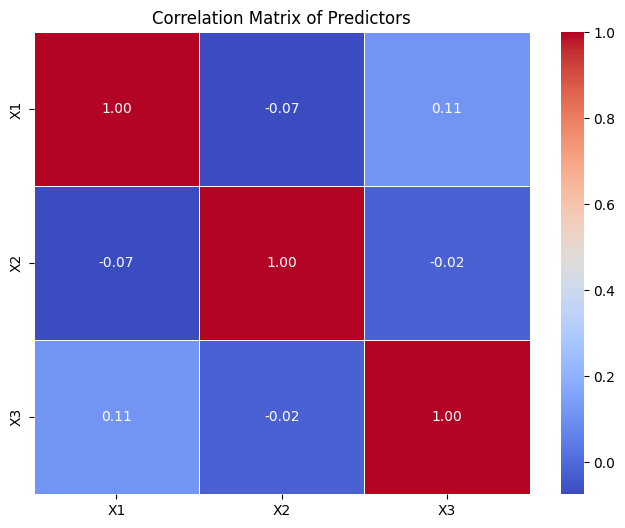

In [ ]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for predictors to visualize correlations
X_df = pd.DataFrame(X, columns=[f'X{i}' for i in range(1, X.shape[1] + 1)])

# Calculate and plot the correlation matrix
corr_matrix = X_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Predictors")
plt.show()

## No Outliers

1. Leverage Plots

2. Cook's Distance

3. Boxplots

4. Residuals

### Leverage Plots

Identify influential data points in terms of leverage (how far a point is from the mean of the predictors).

Data points with high leverage can disproportionately affect the regression results.

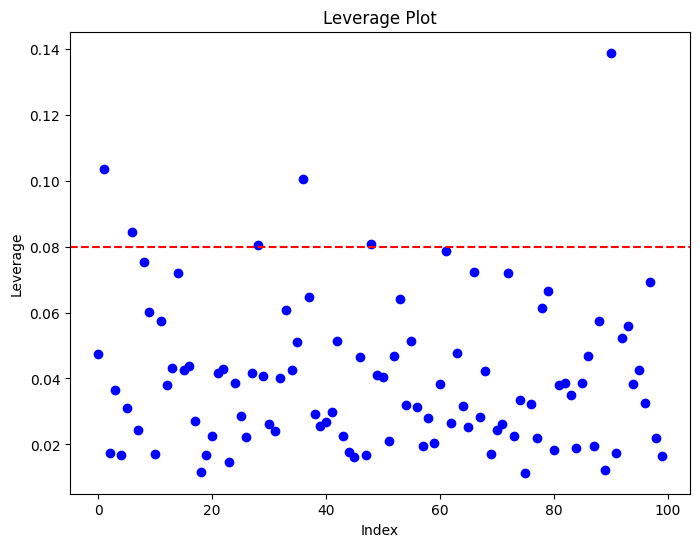

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the model
X_with_intercept = sm.add_constant(X)  # Adds intercept term to the predictors
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Get leverage values
leverage = results.get_influence().hat_matrix_diag

# Plot leverage
plt.figure(figsize=(8, 6))
plt.scatter(range(len(leverage)), leverage, color='blue')
plt.axhline(y=2 * (X_with_intercept.shape[1] / len(X)), color='red', linestyle='--')  # Threshold for high leverage
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage Plot')
plt.show()


###Cook's Distance

Measures the influence of each data point on the estimated regression coefficients.

Points with a large Cook's distance can be considered as outliers.

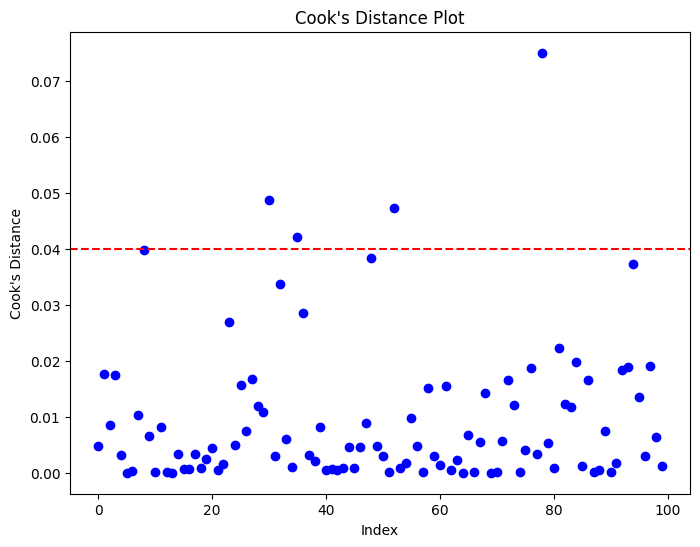

In [ ]:
# Get Cook's distance
cooks_d = results.get_influence().cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.scatter(range(len(cooks_d)), cooks_d, color='blue')
plt.axhline(y=4 / len(X), color='red', linestyle='--')  # Threshold for high influence
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


### Boxplots

Detect univariate outliers for each feature in the dataset.
Standardized

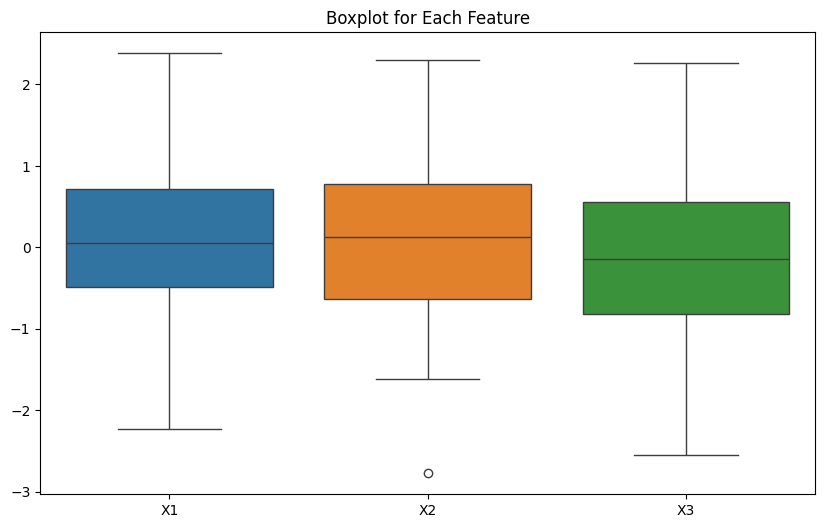

In [ ]:
import seaborn as sns

# Convert predictors to DataFrame for easier plotting
X_df = pd.DataFrame(X, columns=[f'X{i}' for i in range(1, X.shape[1] + 1)])

# Boxplot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_df)
plt.title("Boxplot for Each Feature")
plt.show()


### Residuals

Residuals with large absolute values are often considered outliers.

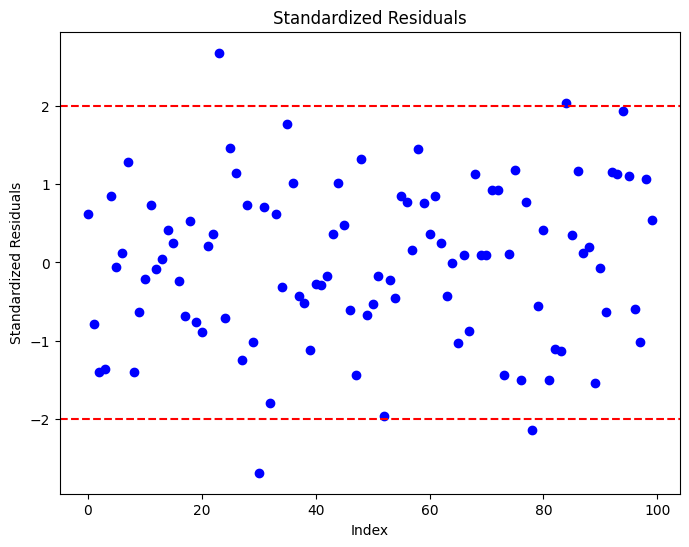

In [ ]:
# Get standardized residuals
standardized_residuals = results.get_influence().resid_studentized_internal

# Plot standardized residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(standardized_residuals)), standardized_residuals, color='blue')
plt.axhline(y=2, color='red', linestyle='--')  # Threshold for outliers
plt.axhline(y=-2, color='red', linestyle='--')  # Threshold for outliers
plt.xlabel('Index')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals')
plt.show()


# Simple Linear Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self):
        self.b0 = 0  # Intercept
        self.b1 = 0  # Slope

    def fit(self, X, y):
        n = len(X)

        # Calculating b1 (slope) using OLS formula
        numerator = n * np.sum(X * y) - np.sum(X) * np.sum(y)
        denominator = n * np.sum(X**2) - np.sum(X)**2
        self.b1 = numerator / denominator

        # Calculating b0 (intercept) using OLS formula
        self.b0 = (np.sum(y) - self.b1 * np.sum(X)) / n

    def predict(self, X):
        # Predicting the output using the learned coefficients
        return self.b0 + self.b1 * X

    def coefficients(self):
        return self.b0, self.b1

# Generate sample data
X, y, true_coef = GenerateRandomData(100, 1) # 1 feature for simple linear regression

print(X.shape)
print(X[:10])
print('\n')

print(y.shape)
print(y[:10])
print('\n')

print(f"Actual Incepcept: {true_coef[1]}, coeffecients: {true_coef[1:]}")
print('\n')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")
print('\n')

# Create LinearRegression object
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X_train, y_train)

# Get the coefficients
b0, b1 = lr_model.coefficients()
print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")

(1000,)
[7.71146097 3.29016159 1.12512958 5.40895162 1.25488497 3.57519607
 8.81826762 3.69161195 6.32508974 5.14625536]


(1000,)
[14.99509116 10.39048372  2.42861253 14.14772871  4.93350704 11.57396269
 18.76064005 10.9306828  12.8604991  14.88360982]


Training data size: 800
Testing data size: 200


Intercept (b0): 3.034945171747671
Slope (b1): 1.9795650024606672


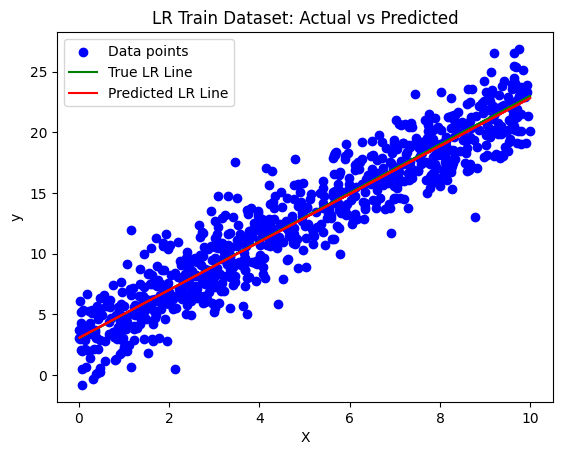

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', label='Data points')

y_train_line = b0_true + b1_true * X_train
plt.plot(X_train, y_train_line, color='green', label='True LR Line')

y_pred_train = lr_model.predict(X_train)
plt.plot(X_train, y_pred_train, color='red', label='Predicted LR Line')


plt.title('LR Train Dataset: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Predictions: [21.33612678  3.27666035 11.27916768 20.10270771 14.24446666 19.55438408
 12.88591699 20.59761978  7.25451599 17.72869338]
Actual: [21.49010422  3.24421039 11.3293274  20.2439526  14.32523709 19.68996864
 12.95266314 20.74397364  7.26312934 17.84543138]


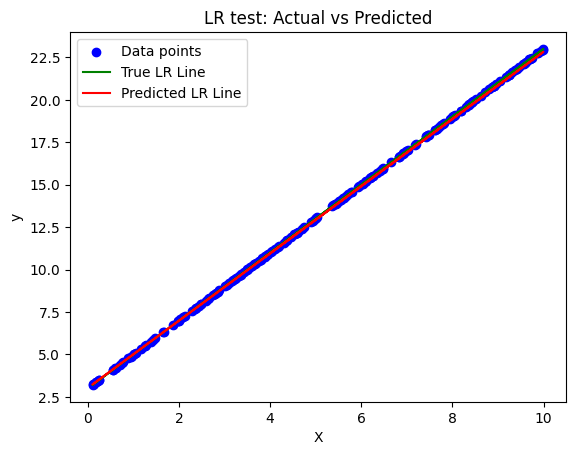

Mean Squared Error (MSE): 0.008491663219031468
R-squared (R²): 0.999744638698178


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the x_test input
y_pred = lr_model.predict(X_test)

print(f"Predictions: {y_pred[:10]}")
print("Actual:",y_test[:10])

# Create scatter plot of the data points
plt.scatter(X_test, y_test, color='blue', label='Data points')
y_test = b0_true + b1_true * X_test
plt.plot(X_test, y_test, color='green', label='True LR Line')
y_pred_test = lr_model.predict(X_test)
plt.plot(X_test, y_pred_test, color='red', label='Predicted LR Line')

plt.title('LR test: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluate the model using Mean Squared Error (MSE), R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Gradient Descent Algorithm

Intercept (b0): 3.0186743310369226
Slope (b1): 1.982036736222987


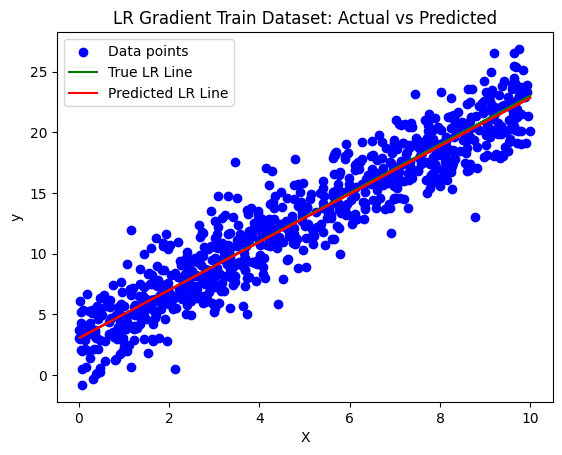

In [ ]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.b0 = 0
        self.b1 = 0

    def fit(self, X, y):
        n = len(X)

        # Gradient Descent Algorithm
        for _ in range(self.epochs):
            y_pred = self.predict(X)
            # Calculate gradients
            d_b0 = -2 * np.sum(y - y_pred) / n
            d_b1 = -2 * np.sum((y - y_pred) * X) / n

            # Update coefficients
            self.b0 -= self.learning_rate * d_b0
            self.b1 -= self.learning_rate * d_b1

    def predict(self, X):
        # Predict using the learned coefficients
        return self.b0 + self.b1 * X

    def coefficients(self):
        return self.b0, self.b1

# Create LinearRegression Gradient Descent object
lr_gd_model = LinearRegressionGD(learning_rate=0.01, epochs=1000)

# Fit the model to the data
lr_gd_model.fit(X_train, y_train)

# Get the coefficients
b0, b1 = lr_gd_model.coefficients()
print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")

# Create scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', label='Data points')

y_train_line = b0_true + b1_true * X_train
plt.plot(X_train, y_train_line, color='green', label='True LR Line')

y_pred_train = lr_gd_model.predict(X_train)
plt.plot(X_train, y_pred_train, color='red', label='Predicted LR Line')


plt.title('LR Gradient Train Dataset: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#  Multiple Linear Regression & Stastical inference of Coeffcients

Actual Incepcept: 0.3984342586196771, coeffecients: [0.39843426 0.06271295 0.42403225]


Model Intercept: 0.18100040988401234, Coefficients: [0.56548359 0.10276287 0.43899957]


---first 5 values of data-----
Actual Values: [ 2.20778774  0.53328583 -0.61053662 -0.15899447  1.59127384]
Predicted values: [1.64932992 1.21107979 0.65739289 1.0664149  0.8187142 ]


Standard Errors: [0.09354532 0.09011586 0.09359286 0.09450016]


Confidence Intervals: Lower: [nan nan nan nan], Upper: [nan nan nan nan]


------------hypothesis testing for each coefficient (t-test)-----------------
Null hypothesis: The coefficient is zero (i.e., no effect).
T-values: [1.93489538 6.27507277 1.09797758 4.64549009]
P-values: [5.59466177e-02 1.00588309e-08 2.74960547e-01 1.07851686e-05]
***fail to reject the null hypothesis, indicating the coefficient is not statistically significant ***
***note the corresponding coefficent, the coefficent is nearly equal to Zero ***
reject the null hypothesis, corresponding coeff

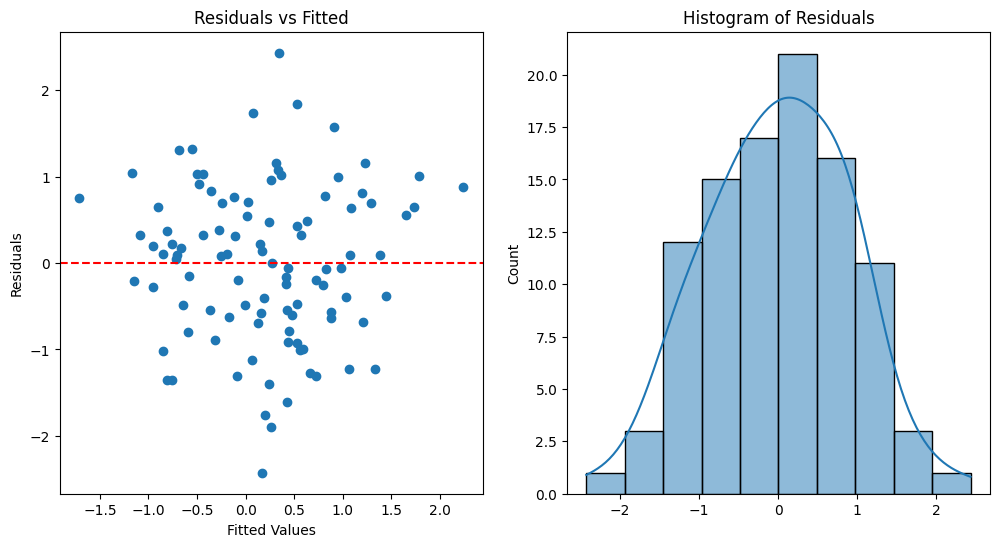

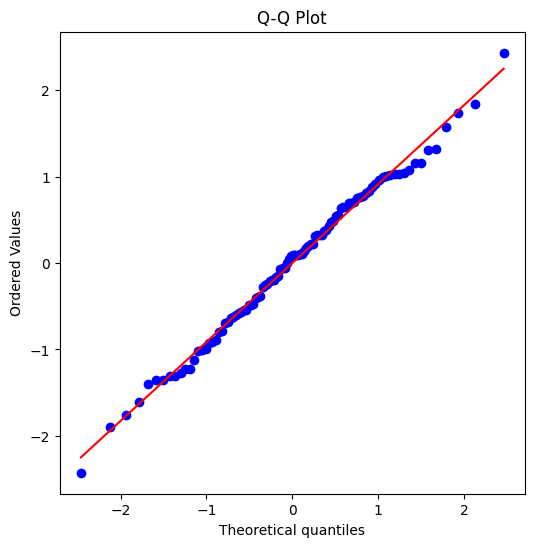

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_percentage_error

class MultipleLinearRegression:
    def __init__(self):
        self.X = None
        self.y = None
        self.X_transpose = None
        self.coef_vec = None

        self.intercept_ = None
        self.coef_ = None

        self.y_pred_ = None
        self.residuals_ = None

    def fit(self, X, y):
        """ Fit the model using Least Squares Estimation (LSE) """
        # Add intercept term (column of ones) to the design matrix (X)
        self.y = y
        self.X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for intercept
        self.X_transpose = self.X.T

        # Calculate the coefficients using the normal equation
        self.coef_vec = np.linalg.inv(self.X_transpose.dot(self.X)).dot(self.X_transpose).dot(y)

        # Extract intercept and coefficients
        self.intercept_ = self.coef_vec[0]
        self.coef_ = self.coef_vec[1:]

        # Predictions
        self.y_pred_ = self.X.dot(self.coef_vec)  # Predicted values (no need for transposition here)
        self.residuals_ = y - self.y_pred_  # Residuals (difference between actual and predicted)

    def predict(self, X):
        """ Predict using the fitted model """
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term (column of ones)
        return X.dot(self.coef_vec)  # Predict based on the fitted coefficients

    def get_params(self):
        """ Get the intercept and coefficients """
        return self.intercept_, self.coef_

    def standard_error(self):
        """ Calculate standard errors of coefficients """
        # Residual variance (Mean Squared Error)
        residual_variance = np.sum(self.residuals_**2) / (len(self.X) - len(self.coef_vec))  # Corrected for degrees of freedom
        covariance_matrix = residual_variance * np.linalg.inv(self.X_transpose.dot(self.X))  # Covariance matrix
        standard_errors = np.sqrt(np.diagonal(covariance_matrix))  # Standard errors are the square root of the diagonal elements
        return standard_errors

    def confidence_intervals(self, confidence = 95):
        """ Calculate 95% confidence intervals for coefficients """
        standard_errors = self.standard_error()
        conf_term = 100 - (100 - confidence)/2
        t_value = stats.t.ppf(conf_term, df=len(self.X) - len(self.coef_vec))  # t-value for 95% confidence and degrees of freedom
        lower_bound = self.coef_vec - t_value * standard_errors
        upper_bound = self.coef_vec + t_value * standard_errors
        return lower_bound, upper_bound

    def hypothesis_testing(self):
        standard_errors = self.standard_error()
        t_values = self.coef_vec / standard_errors  # t-values for coefficients
        p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(self.X) - len(self.coef_vec)))  # p-values for two-tailed t-test

        print('------------hypothesis testing for each coefficient (t-test)-----------------')
        print(f"Null hypothesis: The coefficient is zero (i.e., no effect).")
        print(f"T-values: {t_values}")
        print(f"P-values: {p_values}")

        for p in p_values:
            if(p < 0.05):
                print(f'reject the null hypothesis, corresponding coefficient is statistically significant')
            else:
                print(f'***fail to reject the null hypothesis, indicating the coefficient is not statistically significant ***')
                print(f'***note the corresponding coefficent, the coefficent is nearly equal to Zero ***')

        print('\n')

    def f_statistic(self):
        RSS = np.sum(self.residuals_ ** 2)  # Residual sum of squares
        TSS = np.sum((self.y - np.mean(self.y)) ** 2)  # Total sum of squares
        df_model = len(self.coef_)  # Degrees of freedom for the model
        df_residual = len(self.X) - len(self.coef_) - 1  # Degrees of freedom for residuals
        F = (TSS - RSS) / df_model / (RSS / df_residual)  # F-statistic
        p_value = 1 - stats.f.cdf(F, df_model, df_residual)  # p-value for F-test

        print('------------Perform F-test to check overall model fit-----------------')
        print(f'Null hypothesis: All coefficients (except the intercept) are equal to zero (i.e., no relationship between predictors and response).')
        print(f"F-statistic: {F}, P-value: {p_value}")
        if(p_value < 0.05):
            print(f'reject the null hypothesis, at least one of the predictors is significantly related to the response variable, and the model provides a good fit')
        else:
            print(f'fail to reject the null hypothesis, indicates that the independent variables do not significantly contribute to the model, and the model doesnot fit the data well')
        print('\n')

    def evaluate_model(self, y_true, y_pred):
        residual = y_true - y_pred
        true_mean = np.mean(y_true)

        """Calculate R² (coefficient of determination)."""
        ss_residual = np.sum(residual ** 2)
        ss_total = np.sum((y_true - true_mean) ** 2)
        r2 = 1 - (ss_residual / ss_total)

        """Calculate Adjusted R²."""
        n = len(y_true)  # number of samples
        p = len(self.coef_vec)  # number of features (including intercept)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


        """Calculate Mean Squared Error (MSE)."""
        mse = np.mean(residual ** 2)

        """Calculate Root Mean Squared Error (RMSE)."""
        rmse = np.sqrt(mse)

        """Calculate Mean Absolute Error (MAE)."""
        mae = np.mean(np.abs(y_true - y_pred))

        """Calculate Mean Absolute Percentage Error (MAPE)."""
        mape = np.mean(np.abs((y_true - y_pred) / y_true))

        print('------------Evaluate model performance with different metrics-----------------')
        print(f"R²: {r2}")
        print(f"Adjusted R²: {adj_r2}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape}")
        print('\n')

    def plot_diagnostics(self):
        """ Plot diagnostic plots for residual analysis """
        plt.figure(figsize=(12, 6))

        # Residuals vs Fitted values plot
        plt.subplot(1, 2, 1)
        plt.scatter(self.y_pred_, self.residuals_)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted')

        # Histogram of residuals (normality check)
        plt.subplot(1, 2, 2)
        sns.histplot(self.residuals_, kde=True, bins=10)
        plt.title('Histogram of Residuals')
        plt.show()

        # Q-Q plot (normality check)
        plt.figure(figsize=(6, 6))
        stats.probplot(self.residuals_, dist="norm", plot=plt)
        plt.title('Q-Q Plot')
        plt.show()

# Example usage:

# Generating some random data for demonstration
def GenerateRandomData(n, r):
    np.random.seed(0)
    X = np.random.randn(n, r)  # n samples, r predictors
    true_coef = np.random.rand(r+1)  # Random coefficients
    intercept = true_coef[1]

    # Correct dot product calculation
    y = intercept + np.dot(X, true_coef[1:]) + np.random.randn(n)  # Add noise

    return X, y, true_coef

# Generate sample data
X, y, true_coef = GenerateRandomData(100, 3) # y-shape remains 1

print(f"Actual Incepcept: {true_coef[1]}, coeffecients: {true_coef[1:]}")
print('\n')

# Instantiate and fit the model
model = MultipleLinearRegression()
model.fit(X, y)

# Model parameters
intercept, coefficients = model.get_params()
print(f"Model Intercept: {intercept}, Coefficients: {coefficients}")
print('\n')

# Predictions
y_pred = model.predict(X)
print('---first 5 values of data-----')
print(f'Actual Values: {y[:5]}')
print(f"Predicted values: {y_pred[:5]}")
print('\n')



# Standard errors of coefficients
standard_errors = model.standard_error()
print(f"Standard Errors: {standard_errors}")
print('\n')

# Confidence Intervals for coefficients
lower_bound, upper_bound = model.confidence_intervals()
print(f"Confidence Intervals: Lower: {lower_bound}, Upper: {upper_bound}")
print('\n')

# Inference: Hypothesis testing for coefficients
model.hypothesis_testing()

# F-statistic for overall model fit
model.f_statistic()

# Evaluate model performance with different metrics
model.evaluate_model(y, y_pred)


# Plot diagnostics
model.plot_diagnostics()

# Time-series linear regression analysis on stock market data

## Data Extraction

In [ ]:
import yfinance as yf

# Fetch stock market data (e.g., Apple Inc. stock)
ticker = 'AAPL'  # Apple Inc.
start_date = '2020-01-01'
end_date = '2024-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241577  72.849255  72.021261  72.592624  108872000
2020-01-08  73.403633  73.706264  71.943744  71.943744  132079200


## Data Analysis

In [ ]:
column_headers = [x[0] for x in stock_data.columns]
stock_data.columns=column_headers
# data.reset_index(drop=False, inplace=True)
print(stock_data.head(5))

                Close       High        Low       Open     Volume
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241577  72.849255  72.021261  72.592624  108872000
2020-01-08  73.403633  73.706264  71.943744  71.943744  132079200


In [ ]:
import pandas as pd

# Prepare the data: We'll use 'Close' price for the regression
stock_data['Date'] = stock_data.index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241577,72.849255,72.021261,72.592624,108872000
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


We'll use 'Close' price for the regression.
try to predict Close Price.

<Axes: xlabel='Date'>

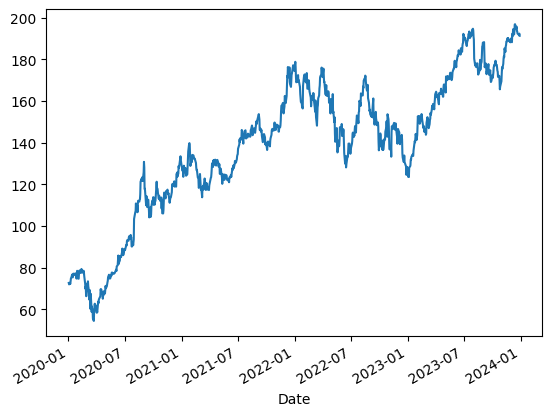

In [ ]:
# We are intrested in 'Close' price for the regression
stock_data['Close'].plot()

##Feature Extraction

In [ ]:
# Create time-based features (e.g., moving averages, lags)
stock_data['Prev_Close'] = stock_data['Close'].shift(1)  # Previous day's close
stock_data['Moving_Avg_5'] = stock_data['Close'].rolling(window=5).mean()  # 5-day moving average
stock_data['Moving_Avg_30'] = stock_data['Close'].rolling(window=30).mean()  # 30-day moving average
stock_data['Lag_1'] = stock_data['Close'].shift(1)  # Previous day's closing price (Lag 1)
stock_data['Lag_2'] = stock_data['Close'].shift(2)  # Previous two day's closing price (Lag 2)

# Drop NaN values
stock_data.dropna(inplace=True)

stock_data[['Close', 'Prev_Close', 'Moving_Avg_5', 'Moving_Avg_30', 'Lag_1', 'Lag_2']].head()

,Close,Prev_Close,Moving_Avg_5,Moving_Avg_30,Lag_1,Lag_2
Date,,,,,,
2020-02-13,78.839142,79.404579,78.300867,76.194292,79.404579,77.562622
2020-02-14,78.858559,78.839142,78.539667,76.399041,78.839142,79.404579
2020-02-18,77.414612,78.858559,78.415903,76.579224,78.858559,78.839142
2020-02-19,78.535782,77.414612,78.610535,76.777654,77.414612,78.858559
2020-02-20,77.730072,78.535782,78.275633,76.960603,78.535782,77.414612


## Data Preparation and Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define independent variables (features) and dependent variable (target)
X = stock_data[['Prev_Close', 'Moving_Avg_5', 'Moving_Avg_30', 'Lag_1', 'Lag_2']]
y = stock_data['Close']

# Split data into training and testing sets (use time-based splitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Linear Regression Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Evalution

Mean Squared Error: 3.8016620691097223
R²: 0.9645098297198881


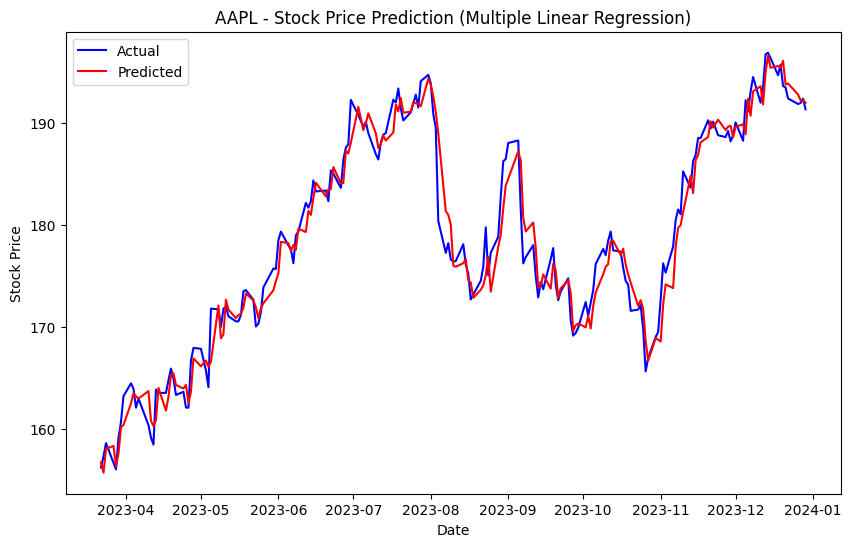

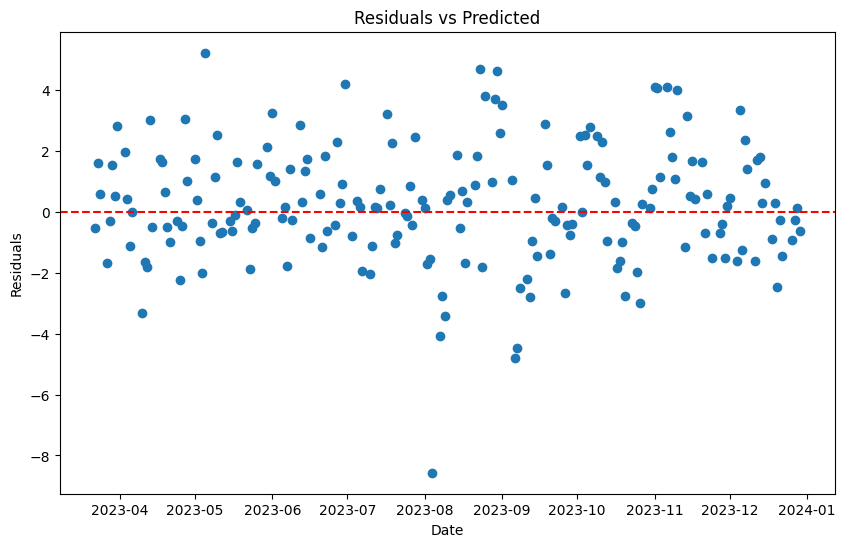

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted", color='red')
plt.title(f'{ticker} - Stock Price Prediction (Multiple Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot residuals to assess model fit
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

for more details on time series ==> learn time series analysis and forecasting

# Polynomial Regression

Polynomial regression is an extension of linear regression

where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an n th - degree polynomial.


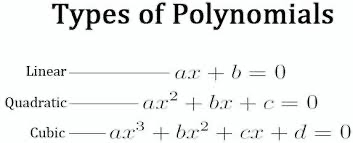

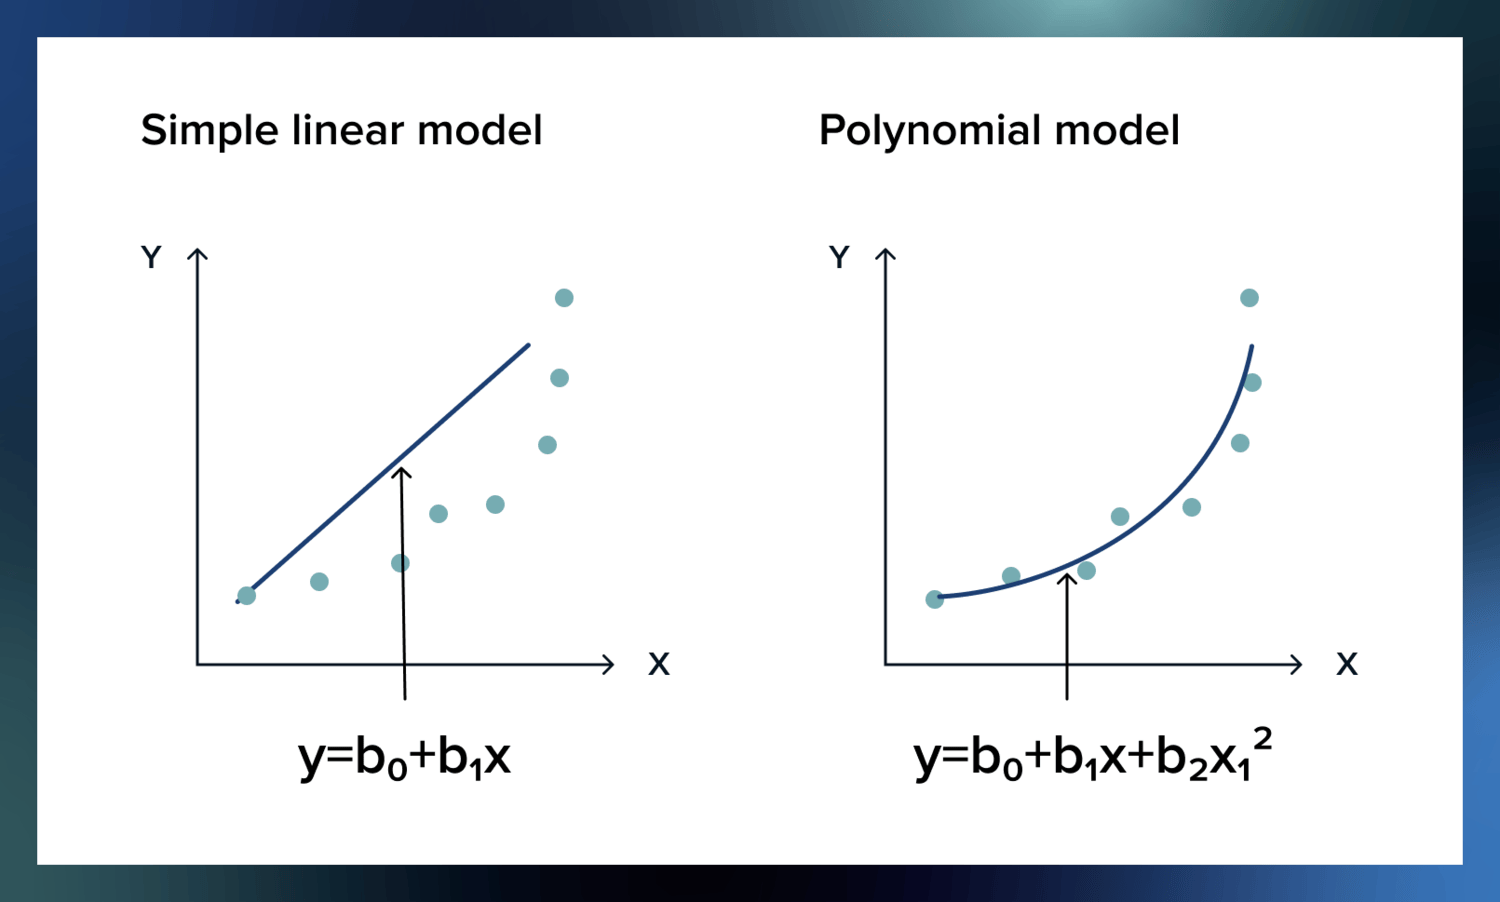

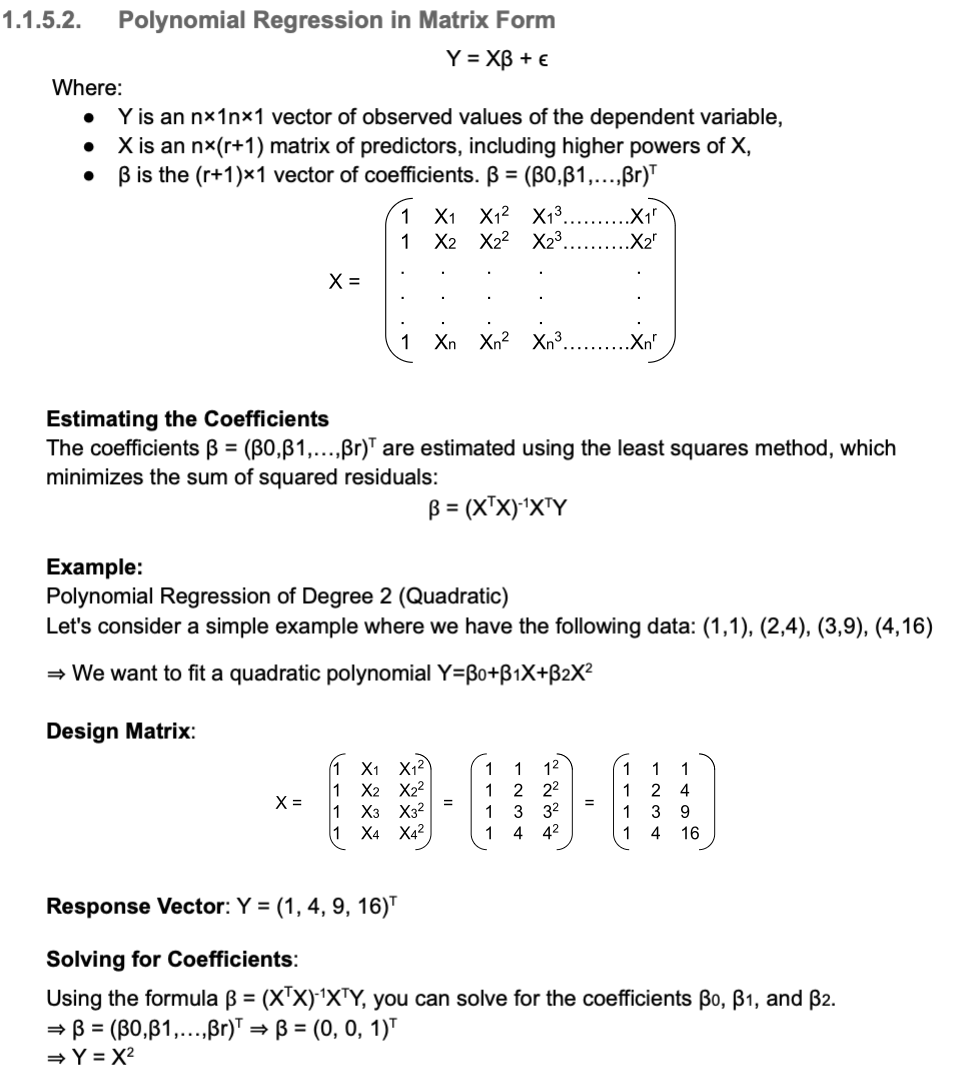

[*********************100%***********************]  1 of 1 completed


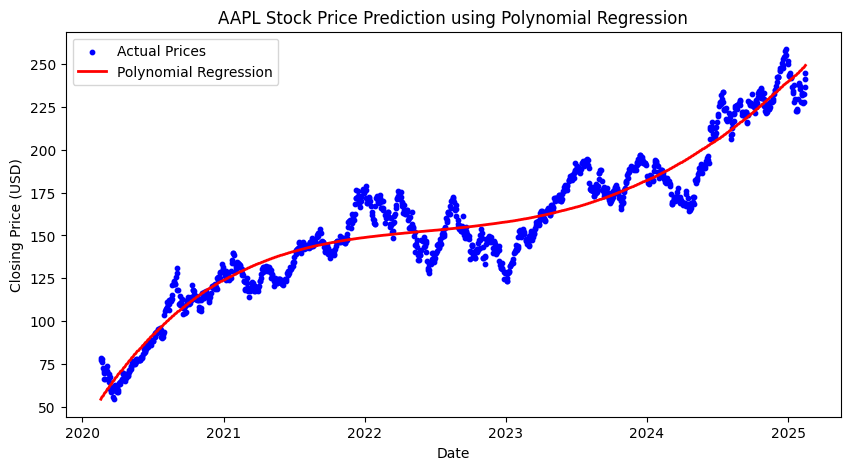

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fetch Apple (AAPL) stock data for the last 5 years
aapl = yf.download('AAPL', period="5y")
aapl['Days'] = np.arange(len(aapl))  # Convert dates to numerical values

# Prepare features (independent variable) and target (dependent variable)
X = aapl[['Days']]
y = aapl['Close']

# Convert to polynomial features (degree 3 for curved trends)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict stock prices
y_pred = model.predict(X_poly)

# Plot results
plt.figure(figsize=(10,5))
plt.scatter(aapl.index, y, color='blue', label='Actual Prices', s=10)
plt.plot(aapl.index, y_pred, color='red', label='Polynomial Regression', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("AAPL Stock Price Prediction using Polynomial Regression")
plt.legend()
plt.show()


# Regularization techniques

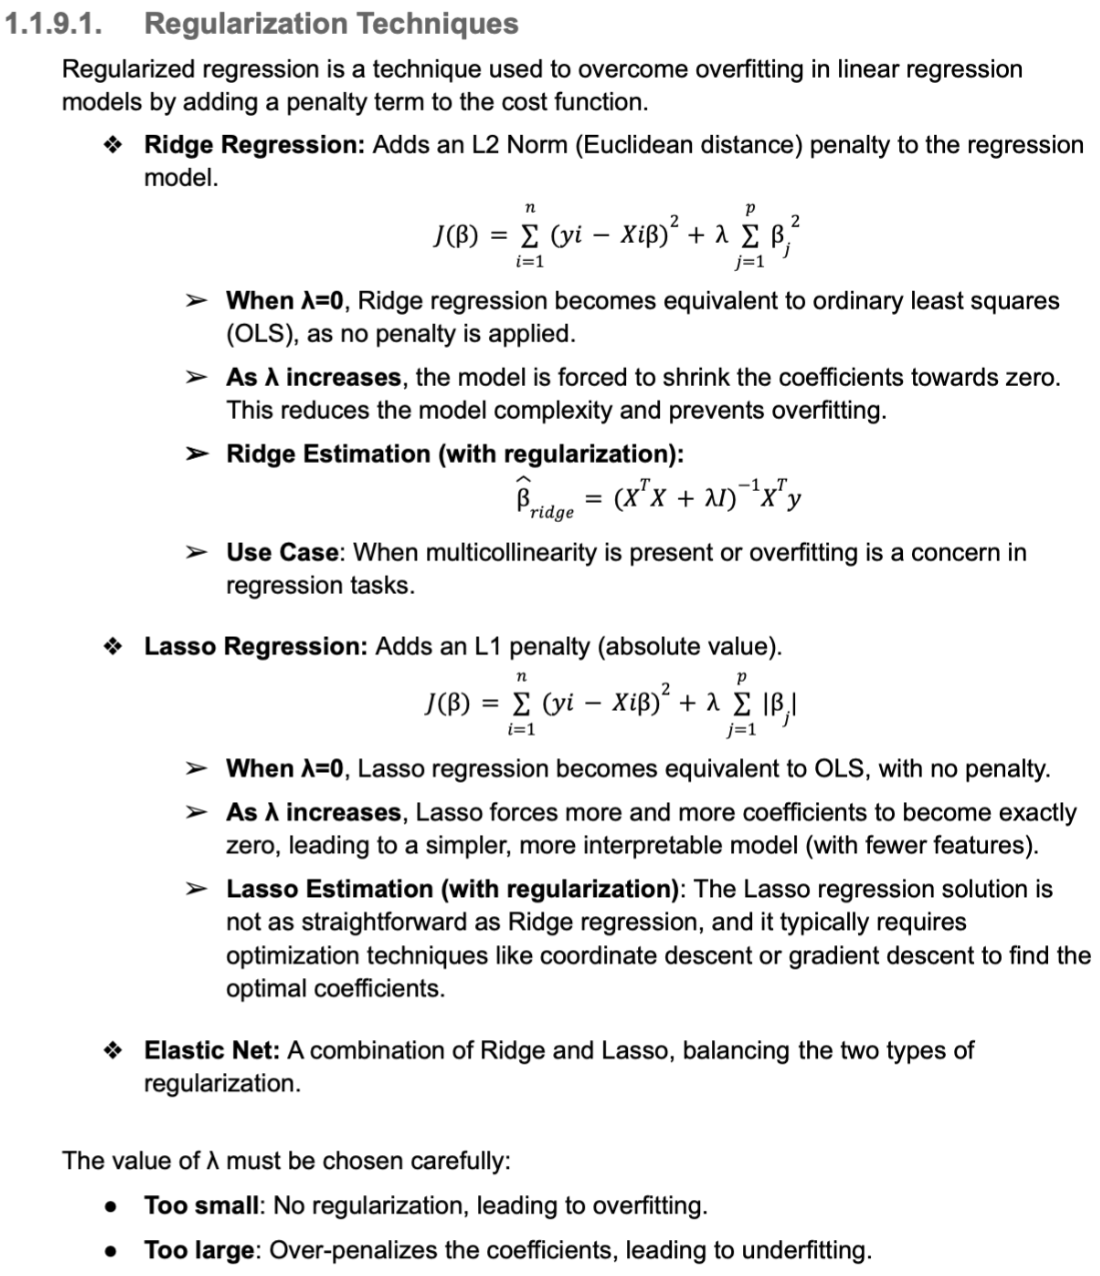

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# Example dataset
X = np.random.rand(100, 3)  # 3 features
y = 3*X[:,0] + 2*X[:,1] + X[:,2] + np.random.randn(100)  # Target with noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Alpha controls penalty strength
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

ridge.coef_

array([2.63058258, 2.09349532, 1.07753552])

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Alpha controls sparsity
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Check selected features
print("Coefficients:", lasso.coef_)  # Some values may be exactly zero


Coefficients: [1.69746928 1.17351305 0.07444368]


## Difference

In [ ]:

import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        self.m = 0  # Slope
        self.c = 0  # Intercept

    def fit(self, X, y):
        X = X.flatten()
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        num = np.sum((X - X_mean) * (y - y_mean))
        den = np.sum((X - X_mean) ** 2)

        self.m = num / den  # Compute slope
        self.c = y_mean - self.m * X_mean  # Compute intercept

    def predict(self, X):
        return self.m * X + self.c


class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Regularization strength
        self.coef_ = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term (intercept)
        I = np.eye(X.shape[1])  # Identity matrix
        I[0, 0] = 0  # Don't penalize bias term

        self.coef_ = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y  # Closed-form solution

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X @ self.coef_

class LassoRegression:
    def __init__(self, alpha=0.1, lr=0.01, iterations=1000):
        self.alpha = alpha  # Regularization strength
        self.lr = lr  # Learning rate
        self.iterations = iterations  # Gradient Descent steps
        self.coef_ = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        m, n = X.shape
        self.coef_ = np.zeros(n)  # Initialize coefficients

        for _ in range(self.iterations):
            y_pred = X @ self.coef_
            gradient = -(2 / m) * X.T @ (y - y_pred) + self.alpha * np.sign(self.coef_)
            self.coef_ -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X @ self.coef_

# Example usage:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

model = SimpleLinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print("Predictions:", predictions)

ridge = RidgeRegression(alpha=0.5)
ridge.fit(X, y)
predictions = ridge.predict(X)
print("Ridge Predictions:", predictions)

lasso = LassoRegression(alpha=0.1, lr=0.01, iterations=5000)
lasso.fit(X, y)
predictions = lasso.predict(X)
print("Lasso Predictions:", predictions)

Predictions: [[2.8]
 [3.4]
 [4. ]
 [4.6]
 [5.2]]
Ridge Predictions: [2.85714286 3.42857143 4.         4.57142857 5.14285714]
Lasso Predictions: [2.64999995 3.29999997 3.94999999 4.60000001 5.25000003]


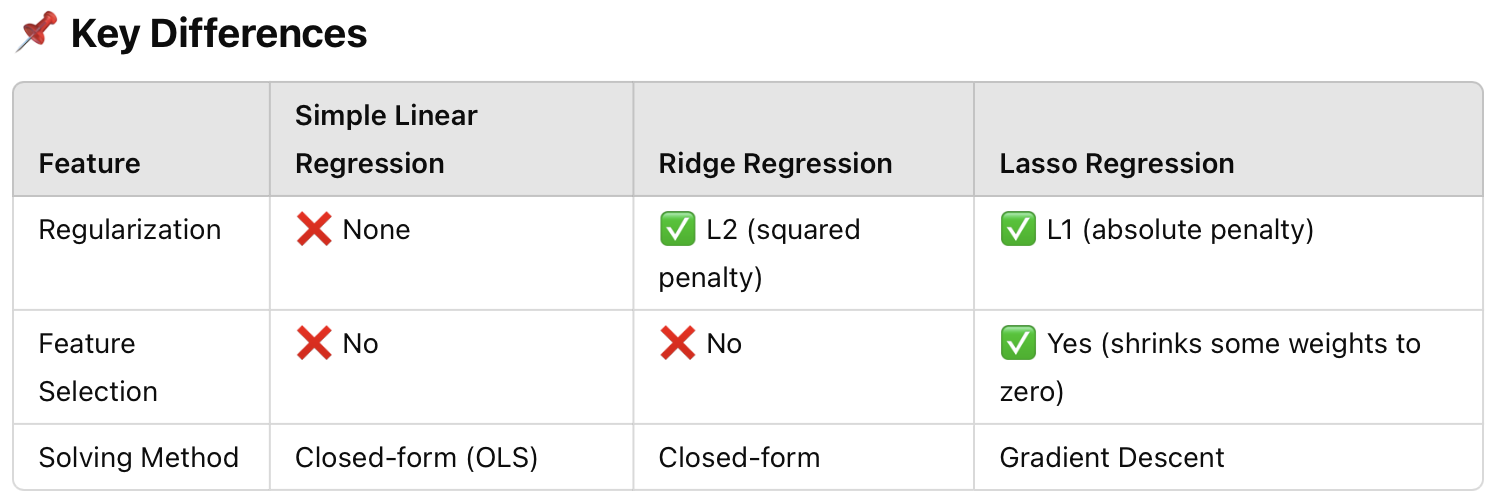

# Model Evalution Metrics
prediction model metrics

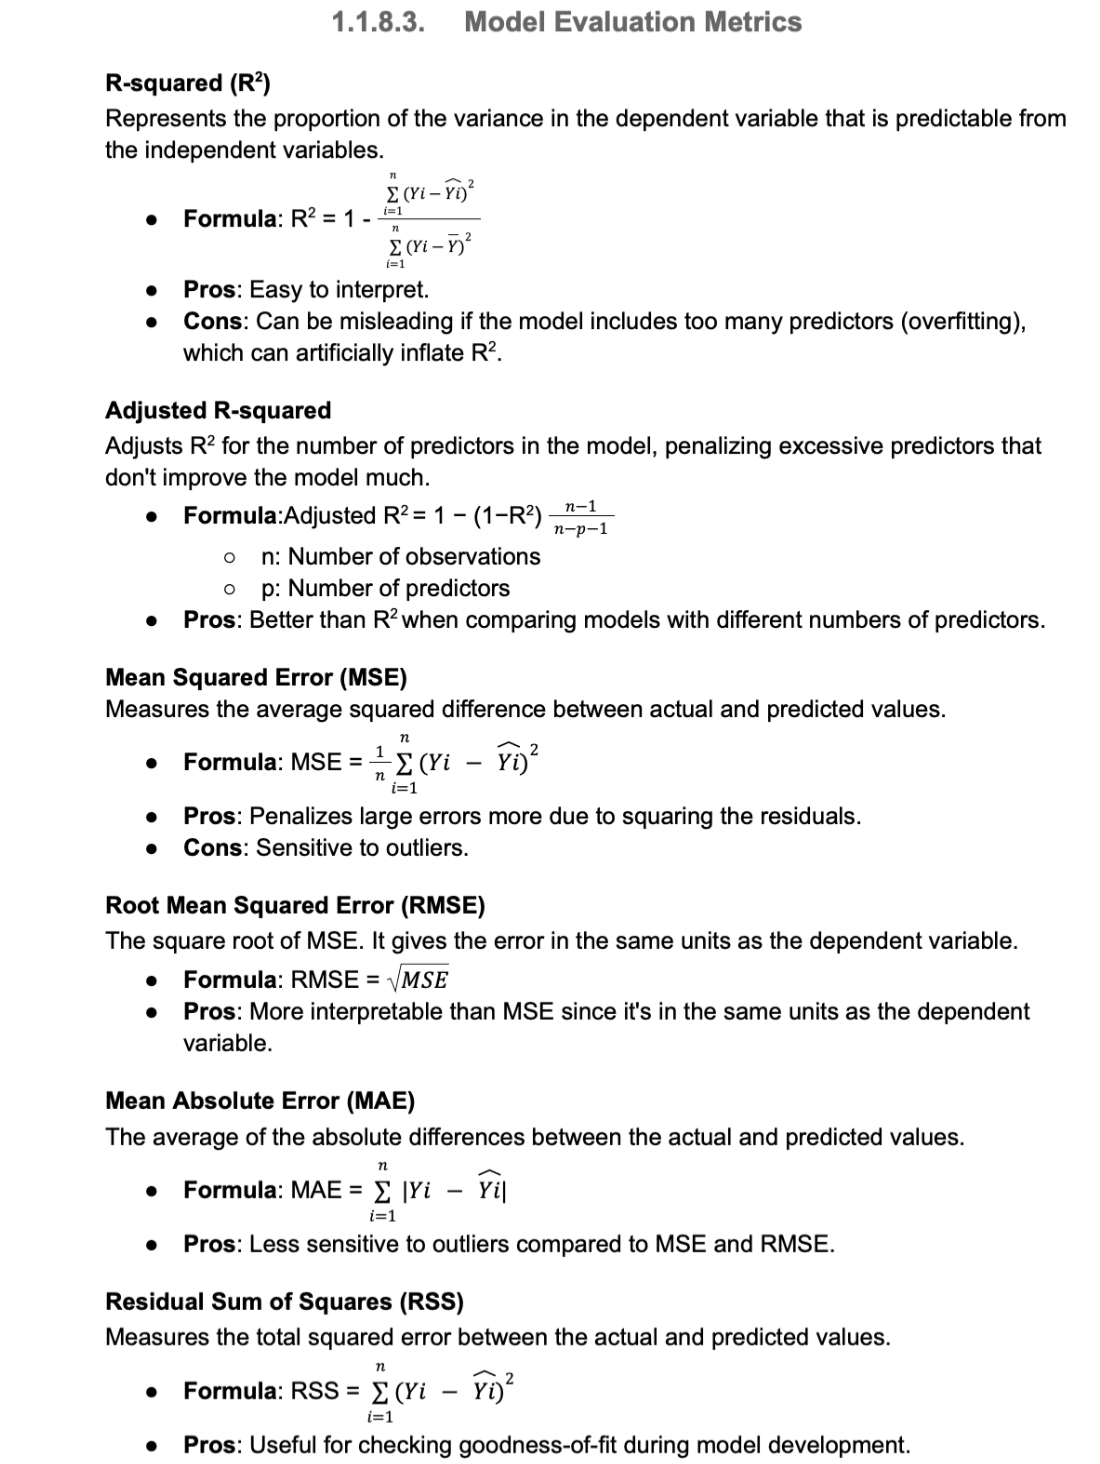

In [ ]:
import numpy as np

class RegressionMetrics:
    def __init__(self, y_true, y_pred, num_predictors=None):
        self.y_true = np.array(y_true)
        self.y_pred = np.array(y_pred)
        self.n = len(y_true)
        self.p = num_predictors if num_predictors else 1  # Default to 1 predictor if not specified

    def r2_score(self):
        """ R-squared (Coefficient of Determination) """
        ss_total = np.sum((self.y_true - np.mean(self.y_true)) ** 2)
        ss_residual = np.sum((self.y_true - self.y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def adjusted_r2_score(self):
        """ Adjusted R-squared """
        r2 = self.r2_score()
        return 1 - ((1 - r2) * (self.n - 1) / (self.n - self.p - 1))

    def mse(self):
        """ Mean Squared Error (MSE) """
        return np.mean((self.y_true - self.y_pred) ** 2)

    def rmse(self):
        """ Root Mean Squared Error (RMSE) """
        return np.sqrt(self.mse())

    def mae(self):
        """ Mean Absolute Error (MAE) """
        return np.mean(np.abs(self.y_true - self.y_pred))

    def rss(self):
        """ Residual Sum of Squares (RSS) """
        return np.sum((self.y_true - self.y_pred) ** 2)

# Example usage:
y_actual = np.array([2, 4, 5, 4, 5])
y_predicted = np.array([2.1, 3.8, 5.2, 4.1, 4.8])

metrics = RegressionMetrics(y_actual, y_predicted, num_predictors=1)

print("R-squared:", metrics.r2_score())
print("Adjusted R-squared:", metrics.adjusted_r2_score())
print("MSE:", metrics.mse())
print("RMSE:", metrics.rmse())
print("MAE:", metrics.mae())
print("RSS:", metrics.rss())

R-squared: 0.9766666666666667
Adjusted R-squared: 0.9688888888888889
MSE: 0.028000000000000032
RMSE: 0.16733200530681522
MAE: 0.16000000000000006
RSS: 0.14000000000000015


# Logistic Regression

## Sigmoid function

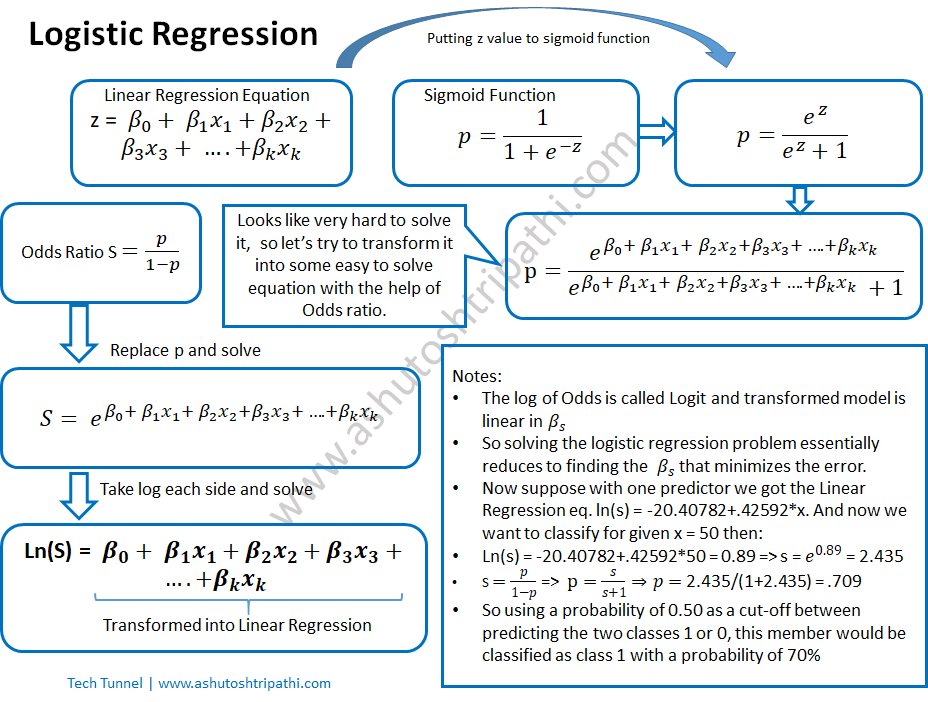

## Logit Transformation or Log of Odds

Ln(S) ==> Transformed into Linear Regression known as ***log of Odds***

## Cost function (Binary Cross-Entropy)

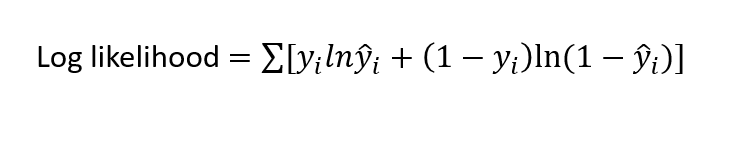

Logistic regression uses an iterative process of maximum likelihood to fit the model

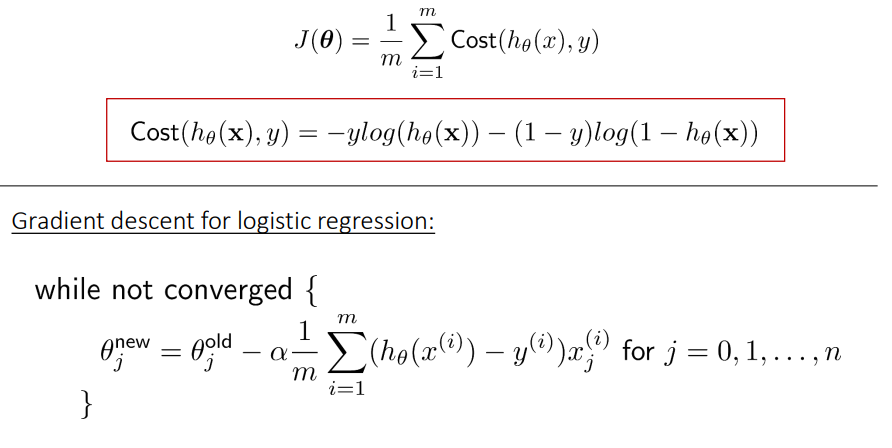

## Situations Where Logistic Regression is Preferred Over Linear Regression

1. Binary Classification Problems

A linear regression model relies on a continuous dependent variable. In contrast, logistic regression models rely on binary dependent variables.

2. When the Relationship Between X and Y is Non-Linear

3. Probability Estimation is Needed

4. Robustness to Outliers


## Assumptions of Logistic Regression



1. The Dependent Variable is Binary (or Multi-Class in Extensions)

Logistic regression is designed for categorical outcomes, especially binary classification. For multi-class classification, Softmax (Multinomial Logistic Regression) is used.

2. No Perfect Multicollinearity

Features should not be highly correlated, as it distorts coefficient interpretation.

3. Independent Observations

The observations should not be related (e.g., time-dependent data without adjustment). For dependent data (like time series), consider Time Series Logistic Regression or Recurrent Neural Networks (RNNs).

4. Linearity of Independent Variables in the Log-Odds

Logistic regression assumes that the independent variables have a linear relationship with the log-odds (not directly with Y). If non-linear, use polynomial features, log transformations, or non-linear models like decision trees.

5. Large Sample Size

mall datasets (e.g., 50 samples) can lead to unreliable probability estimates. Use regularization (L1/L2) or collect more data if the dataset is too small.

6. No Auto-Correlation (for Time-Series Data)

Logistic regression assumes data points are not autocorrelated. For time-dependent data, use Time-Series Models like ARIMA or LSTM.




When These Assumptions are Violated? consider:

✅ Non-linear models (Decision Trees, Random Forests)

✅ Regularization techniques (Lasso, Ridge)

✅ Transforming variables (Polynomial features)

## Data Generation

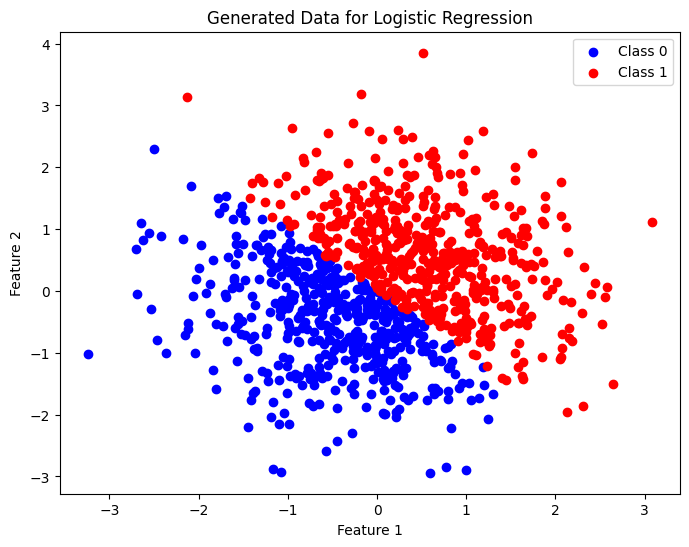

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 1000
X = np.random.randn(n, 2)  # 2 features for each observation
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary target: 1 if X1 + X2 > 0, else 0

# Create a DataFrame for convenience
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y


# Plotting the data to visualize the binary classification
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Target'] == 0]['Feature1'], df[df['Target'] == 0]['Feature2'], color='blue', label='Class 0')
plt.scatter(df[df['Target'] == 1]['Feature1'], df[df['Target'] == 1]['Feature2'], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data for Logistic Regression')
plt.legend()
plt.show()

## Logistic Regression Implementation

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """ Sigmoid activation function """
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y_true, y_pred):
        """ Binary Cross-Entropy Loss """
        m = len(y_true)
        cost = (-1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y):
        """ Train the model using gradient descent """
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            # Compute linear combination
            linear_model = np.dot(X, self.weights) + self.bias # log-odds (z = np.dot(X, self.weights) + self.bias)
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 100 iterations
            if epoch % 100 == 0:
                loss = self.compute_cost(y, y_pred)
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        """ Make predictions (0 or 1) """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)  # Convert probabilities to binary output


## Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (use time-based splitting)
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2']].values, df['Target'].values, test_size=0.2, shuffle=False)

## Training & Evalution

In [ ]:
# Train logistic regression
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Accuracy
accuracy = np.mean(predictions == y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.2841
Epoch 200: Loss = 0.2181
Epoch 300: Loss = 0.1871
Epoch 400: Loss = 0.1681
Epoch 500: Loss = 0.1548
Epoch 600: Loss = 0.1448
Epoch 700: Loss = 0.1369
Epoch 800: Loss = 0.1304
Epoch 900: Loss = 0.1250
Model Accuracy: 0.9950


#END